<div style="background-color: #1e1e2e; color: #cdd6f4;"><center><br><h1>KDAG Task 2 - Music Genre Analysis</h1>

<hr>

<h3>This notebook was written by <b>Rohan Kumar Sah</b> - 24ME10134</h3>


Each cell contains its explanation right below. Reasoning is explained in the report. The code may take 20ish seconds or more to run because I average the metrics over 100 iterations, feel free to reduce the value if needed.</center><br></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

sns.set_style("dark")
np.seterr(all='ignore') 

df = pd.read_csv("Task2_dataset.csv")
data = df.values.tolist()

keyword1 = [x[1] for x in data]
keyword2 = [x[2] for x in data]
keyword3 = [x[3] for x in data]

vocab1 = sorted(set([x[1] for x in data]))
vocab2 = sorted(set([x[2] for x in data]))
vocab3 = sorted(set([x[3] for x in data]))
genres = sorted(set([x[4] for x in data]))

print("Genres : ",genres)

Genres :  ['classical', 'country', 'hip-hop', 'pop', 'rock']


We start by importing all the necessary libraries, do general setup, read the dataset and convert it into a list simply for comfort.
Next, we extract the keywords and take the unique and sorted entries to form three sets of vocabularies. Also note that we are working with 5 genres here.

In [2]:
BoW1 = []
BoW2 = []
BoW3 = []

for i in range(len(vocab1)):
    BoW1.append([0]*len(vocab1))
    BoW1[i][i] = keyword1.count(vocab1[i])

for i in range(len(vocab2)):
    BoW2.append([0]*len(vocab2))
    BoW2[i][i] = keyword2.count(vocab2[i])

for i in range(len(vocab3)):
    BoW3.append([0]*len(vocab3))
    BoW3[i][i] = keyword3.count(vocab3[i])


for i in range(len(vocab1)):
    print(vocab1[i],BoW1[i])

print("-------------------------------------------------------")

for i in range(len(vocab2)):
    print(vocab2[i],BoW2[i])

print("-------------------------------------------------------")

for i in range(len(vocab3)):
    print(vocab3[i],BoW3[i])




banjo [6, 0, 0, 0, 0, 0]
brass [0, 11, 0, 0, 0, 0]
guitar [0, 0, 65, 0, 0, 0]
piano [0, 0, 0, 12, 0, 0]
synth [0, 0, 0, 0, 43, 0]
violin [0, 0, 0, 0, 0, 10]
-------------------------------------------------------
angry [12, 0, 0, 0, 0, 0, 0, 0, 0]
calm [0, 11, 0, 0, 0, 0, 0, 0, 0]
emotional [0, 0, 11, 0, 0, 0, 0, 0, 0]
energetic [0, 0, 0, 27, 0, 0, 0, 0, 0]
happy [0, 0, 0, 0, 30, 0, 0, 0, 0]
mellow [0, 0, 0, 0, 0, 28, 0, 0, 0]
nostalgic [0, 0, 0, 0, 0, 0, 3, 0, 0]
sad [0, 0, 0, 0, 0, 0, 0, 21, 0]
upbeat [0, 0, 0, 0, 0, 0, 0, 0, 4]
-------------------------------------------------------
acoustic [9, 0, 0, 0, 0, 0, 0, 0, 0, 0]
danceable [0, 5, 0, 0, 0, 0, 0, 0, 0, 0]
distorted [0, 0, 5, 0, 0, 0, 0, 0, 0, 0]
fast [0, 0, 0, 28, 0, 0, 0, 0, 0, 0]
heavy [0, 0, 0, 0, 10, 0, 0, 0, 0, 0]
melodic [0, 0, 0, 0, 0, 27, 0, 0, 0, 0]
rhythmic [0, 0, 0, 0, 0, 0, 14, 0, 0, 0]
slow [0, 0, 0, 0, 0, 0, 0, 23, 0, 0]
twangy [0, 0, 0, 0, 0, 0, 0, 0, 6, 0]
upbeat [0, 0, 0, 0, 0, 0, 0, 0, 0, 20]


We use __BoW (Bag of Words)__ for creating embeddings from keyword_1, keyword_2 and keyword_3

In [3]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):

        self.mean = np.mean(X, axis=0)
        X = X-self.mean

        cov = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
 
        eigenvectors = eigenvectors.T
        
        idxs = np.argsort(eigenvalues)[::-1][:self.n_components]
        self.eigenvectors = eigenvectors[idxs]
        self.eigenvalues = eigenvalues[idxs]
        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        X = X-self.mean
        return np.dot(X, self.components.T)
    
pca = PCA(2)

pca.fit(BoW1)
vec1 = pca.transform(BoW1)

pca.fit(BoW2)
vec2 = pca.transform(BoW2)

pca.fit(BoW3)
vec3 = pca.transform(BoW3)

We create a __PCA__ class and create functions to reduce our vectors to two dimensions. I will not be going into the details of the formulas themselves because it will be too lengthy. We apply PCA on each of the set of vectors to get our final set of reduced vectors __vec1__, __vec2__ and __vec3__.

In [4]:
class SongEntry:
    def __init__(self, raw):
        songid,keyword1,keyword2,keyword3,genre = raw
        vec=(vec1[vocab1.index(keyword1)]+vec2[vocab2.index(keyword2)]+vec3[vocab3.index(keyword3)])/3
        self.songid = songid
        self.vec = vec
        self.genre = genre


songlist = [SongEntry(x) for x in data]

vectors = [x.vec for x in songlist]
Xvectors = [x.vec[0] for x in songlist]
Yvectors = [x.vec[1] for x in songlist]

We create a class __SongEntry__ to store each record, the three vectors corresponding to each __song_id__ are combined by averaging.
We initialise a list __songlist__ of the objects. __vectors__, __Xvectors__ and __Yvectors__ respectively are lists of the vectors and their x and y components.

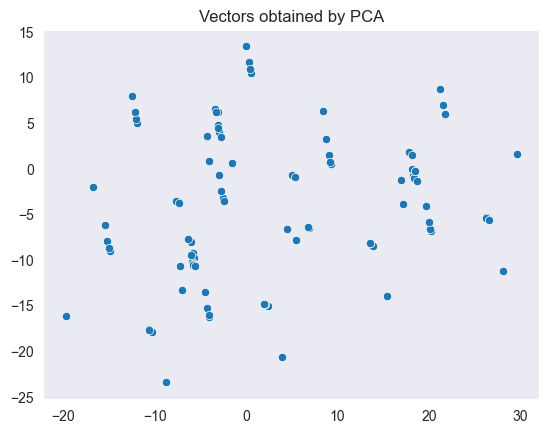

In [5]:
sns.scatterplot(x=Xvectors,y=Yvectors, marker="o")
plt.title("Vectors obtained by PCA")
plt.show()

In [6]:
def euclideanDistance(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

class KMeanspp:
    def __init__(self, n_clusters=5, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):

        self.centroids = [random.choice(X)]
        for _ in range(self.n_clusters-1):
            
            dists = np.sum([euclideanDistance(centroid, X) for centroid in self.centroids], axis=0)
            
            dists /= np.sum(dists)
            
            new_centroid_idx, = np.random.choice(range(len(X)), size=1, p=dists)
            self.centroids += [X[new_centroid_idx]]

        #Comment the above, and Uncomment below for simple KMeans
        # min_, max_ = np.min(X, axis=0), np.max(X, axis=0)
        # self.centroids = [random.uniform(min_, max_) for _ in range(self.n_clusters)]
        
        
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X:
                dists = euclideanDistance(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        wcss = 0
        for x in X:
            dists = euclideanDistance(x, self.centroids)
            wcss += (np.min(dists))**2
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs, wcss

Above is the code for the K-Means++ Algorithm.
First we define a function for calculating euclidean distance given a point and an array.
Then we start with defining the class __Kmeanspp__ :
- We take in the number of clusters and the maximum iterations from the user
- We then start with the `fit()` method
    1. First we randomly initialise a centroid from the set of points we have.
    2. We run a for loop, calculate the sum of distances from the centroids for each of the point, normalise these distancess and then choose a new centroid from the remaining points using these distances as probability weights.
    3. You can comment out the code block and uncomment the two lines below for the standard K-Means Clustering since they both differ only in the initialisation of the centroids.
    4. In the next while loop, we check if we are under the maximum iterations specified and if all the centroids have stabilised or not and if the conditions are met we run the code block inside. For each point, we calculate the distance from each of the centroids, and store it in a second list at the index corresponding to the minimum distance. We reassign the centroids to the mean of the points closest to that centroid. We also handle the NaN case by reassigning the centroid to the one in the previous iteration.
- Moving on to the `evaluate()` method
    1. We now have our centroids provided `fit()` was run. For each point, find the closest centroid, increment the WCSS Score (needed for further analysis) by the square of the distance to the closest centroid. Append our point to the list of the corresponding cluster and append the index to our list of indices needed later for plotting.

C:\Users\Rohan\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


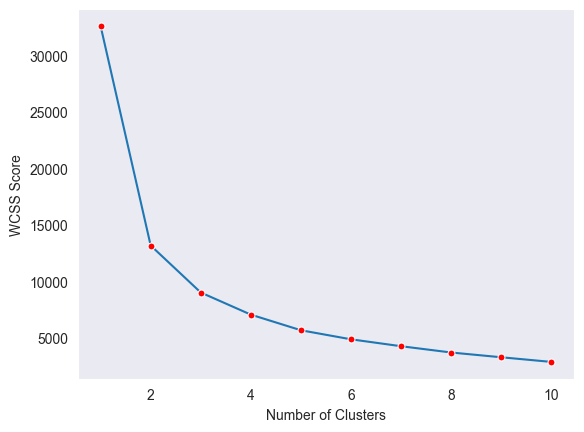

In [7]:
WCSSscores = []
for i in range(1,11):
    kmeans = KMeanspp(n_clusters=i)
    wccsList = []
    for j in range(100):
        kmeans.fit(vectors)
        class_centers, classification, wcss = kmeans.evaluate(vectors)
        wccsList.append(wcss)
    WCSSscores.append([i,np.mean(wccsList)])

sns.lineplot(x=[x[0] for x in WCSSscores],y=[x[1] for x in WCSSscores], marker='o',markersize=5, markerfacecolor='red').set(xlabel='Number of Clusters', ylabel='WCSS Score')
plt.show()

Within-Cluster Sum of Squares is used for justifying our choice of k in the report. The values are calculated for k $ \in \{1,2,3,4,5,6,7,8,9,10\} $ which are averaged over 100 iterations.

C:\Users\Rohan\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


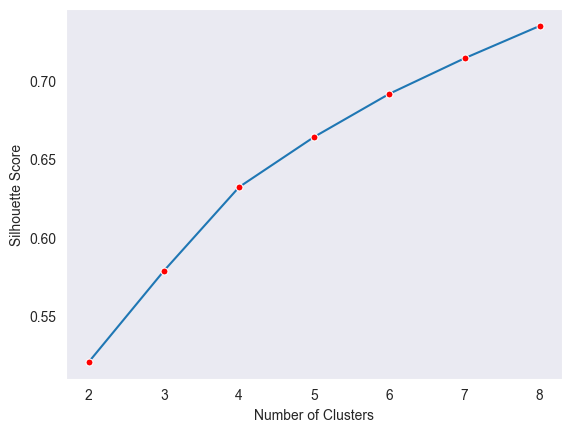

In [ ]:
FinalSet=[]
for k in range(100):
    SilhouetteScores = []
    for i in range(2,9):
        kmeans = KMeanspp(n_clusters=i)
        kmeans.fit(vectors)
        class_centers, classification, wcss = kmeans.evaluate(vectors)
        A = np.zeros(len(vectors))
        B = np.zeros(len(vectors))
        for j, vector in enumerate(vectors):
            SelfClusterIdx = np.where(classification==classification[j])
            SelfCluster = np.array(vectors)[SelfClusterIdx]
            A[j] = np.mean(euclideanDistance(vector, SelfCluster))

            OtherClusterIdx = np.where(classification!=classification[j])
            OtherCluster = np.array(vectors)[OtherClusterIdx]
            B[j] = np.mean(euclideanDistance(vector, OtherCluster))

        score = np.mean((B-A)/np.maximum(A,B))
        SilhouetteScores.append([i,score])
    FinalSet.append(SilhouetteScores)
FinalSet = np.mean(FinalSet, axis = 0)


sns.lineplot(x=[x[0] for x in FinalSet],y=[x[1] for x in FinalSet], marker='o',markersize=5, markerfacecolor='red').set(xlabel='Number of Clusters', ylabel='Silhouette Score')
plt.show()

Silhouette Score is also used for justifying our choice of k in the report. The values are calculated for k $ \in \{2,3,4,5,6,7,8\} $ which are averaged over 100 iterations.

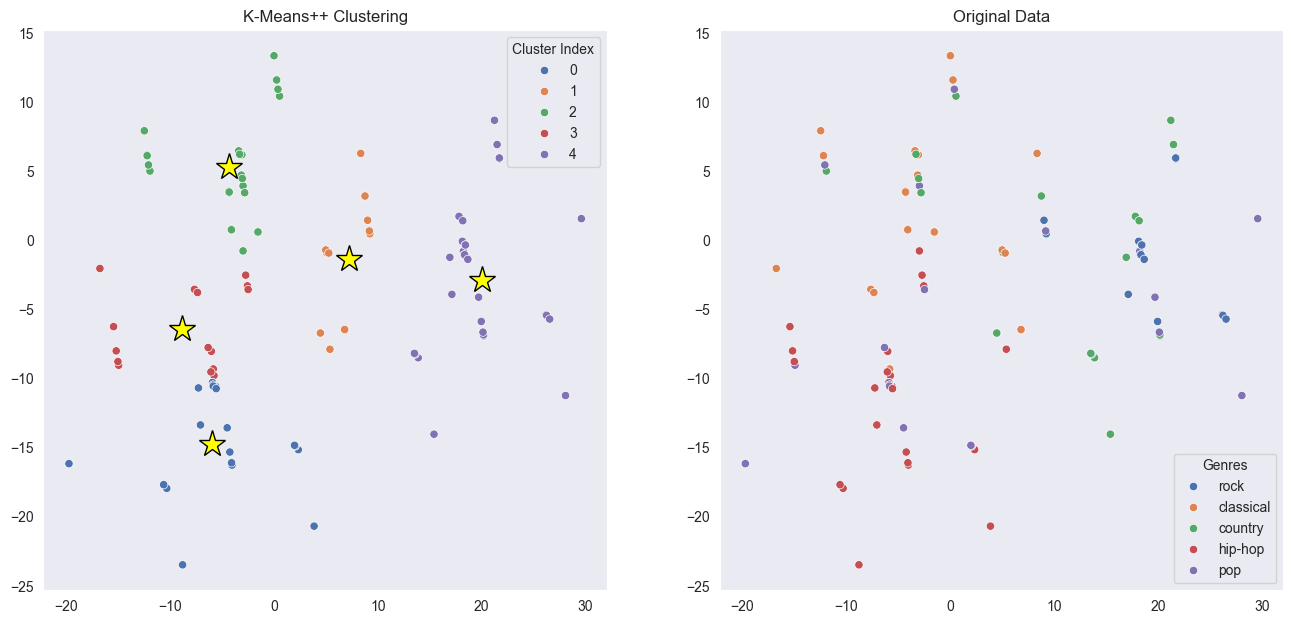

Final Silhouette Score = 0.6799104298586779


In [9]:
kmeans = KMeanspp(n_clusters=5)
kmeans.fit(vectors)
class_centers, classification, wcss = kmeans.evaluate(vectors)

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
sns.scatterplot(x=Xvectors, y=Yvectors, hue=classification, marker="o", palette="deep")
plt.plot([x[0] for x in kmeans.centroids],[y[1] for y in kmeans.centroids],'*', markerfacecolor='yellow', markeredgecolor='black',markersize=20)
plt.title("K-Means++ Clustering")
plt.legend(title="Cluster Index")

plt.subplot(2, 2, 2)
sns.scatterplot(x=Xvectors,y=Yvectors,hue=[X.genre for X in songlist], marker="o", palette="deep")
plt.title("Original Data")
plt.legend(title="Genres")
plt.show()

A = np.zeros(len(vectors))
B = np.zeros(len(vectors))
for j, vector in enumerate(vectors):
    SelfClusterIdx = np.where(classification==classification[j])
    SelfCluster = np.array(vectors)[SelfClusterIdx]
    A[j] = np.mean(euclideanDistance(vector, SelfCluster))

    OtherClusterIdx = np.where(classification!=classification[j])
    OtherCluster = np.array(vectors)[OtherClusterIdx]
    B[j] = np.mean(euclideanDistance(vector, OtherCluster))

    score = np.mean((B-A)/np.maximum(A,B))

print("Final Silhouette Score =", score)

This cell simply does the job of visualising our clusters alongiside our original data.
It also prints out our Final Silhouette Score for the analysis part of the task.

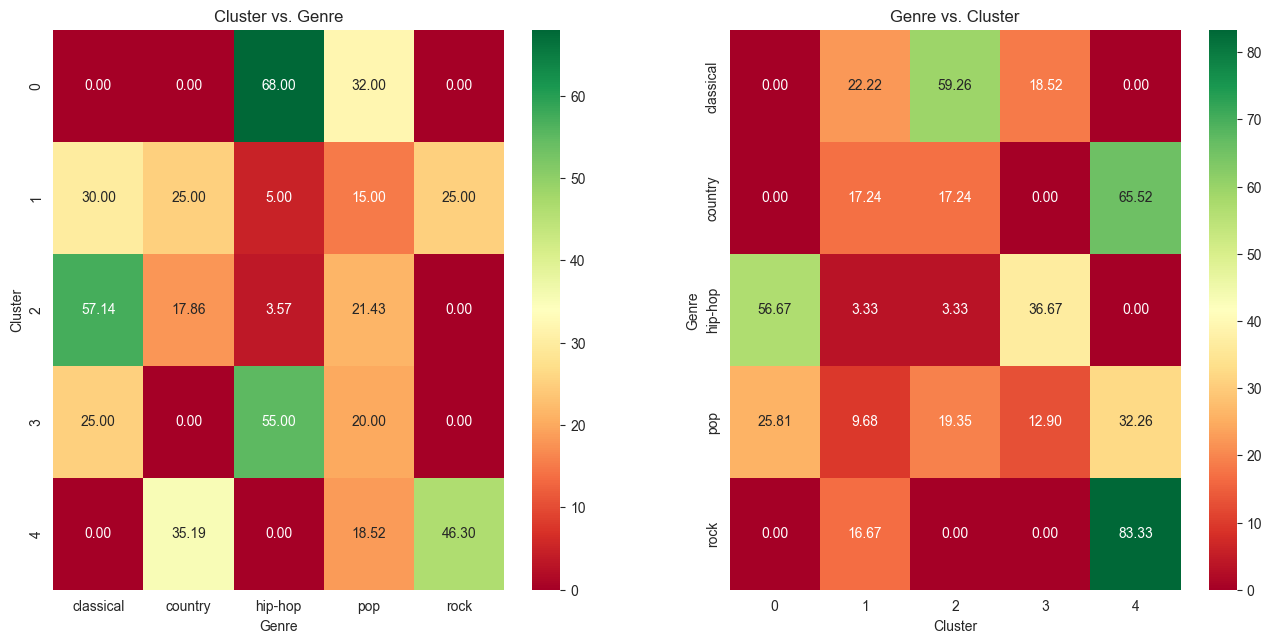

In [ ]:
plt.figure(figsize=(16, 16))


df = pd.DataFrame({
    'Cluster': classification,
    'Genre': [X.genre for X in songlist]
})

cluster_genre_counts = df.groupby(['Cluster', 'Genre']).size().unstack(fill_value=0)

cluster_genre_percentage = cluster_genre_counts.div(cluster_genre_counts.sum(axis=1), axis=0) * 100
plt.subplot(2, 2, 1)
sns.heatmap(cluster_genre_percentage, annot=True, cmap="RdYlGn", fmt=".2f")
plt.xlabel("Genre")
plt.ylabel("Cluster")
plt.title("Cluster vs. Genre")

df = pd.DataFrame({
    'Cluster': classification,
    'Genre': [X.genre for X in songlist]
})

genre_cluster_counts = df.groupby(['Genre', 'Cluster']).size().unstack(fill_value=0)

genre_cluster_percentage = genre_cluster_counts.div(genre_cluster_counts.sum(axis=1), axis=0) * 100

plt.subplot(2, 2, 2)
sns.heatmap(genre_cluster_percentage, annot=True, cmap="RdYlGn", fmt=".2f")
plt.ylabel("Genre")
plt.xlabel("Cluster")
plt.title("Genre vs. Cluster")
plt.show()

This cell does the job of visualising our results using heatmaps. The heatmaps are plotted with percentages with respect to both genres within each cluster and distribution of each genre among the clusters

In [14]:
word1 = ['piano', 'calm', 'slow']
word2 = ['guitar', 'emotional', 'distorted']
word3 = ['synth', 'mellow', 'distorted']
wordvector1=(vec1[vocab1.index(word1[0])]+vec2[vocab2.index(word1[1])]+vec3[vocab3.index(word1[2])])/3
wordvector2=(vec1[vocab1.index(word2[0])]+vec2[vocab2.index(word2[1])]+vec3[vocab3.index(word2[2])])/3
wordvector3=(vec1[vocab1.index(word3[0])]+vec2[vocab2.index(word3[1])]+vec3[vocab3.index(word3[2])])/3

dists = euclideanDistance(wordvector1, kmeans.centroids)
centroid_idx = np.argmin(dists)
print(word1,"belongs to cluster",centroid_idx)

dists = euclideanDistance(wordvector2, kmeans.centroids)
centroid_idx = np.argmin(dists)
print(word2,"belongs to cluster",centroid_idx)

dists = euclideanDistance(wordvector3, kmeans.centroids)
centroid_idx = np.argmin(dists)
print(word3,"belongs to cluster",centroid_idx)

['piano', 'calm', 'slow'] belongs to cluster 2
['guitar', 'emotional', 'distorted'] belongs to cluster 4
['synth', 'mellow', 'distorted'] belongs to cluster 3


Here we analyse the given vectors and find the centroid closest to them, assigning them a cluster which is used in the analysis part of our report.

<center><h1>The End</h1><hr></center>